In [38]:
import keras
import numpy as np                ### Import needed packages
import pandas as pd
import seaborn as sns

In [39]:
test_df = pd.read_csv("test.csv")

In [40]:
test_df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [41]:
test_df.shape          ### Seeing the size of the dataset

(1459, 80)

In [42]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<AxesSubplot:>

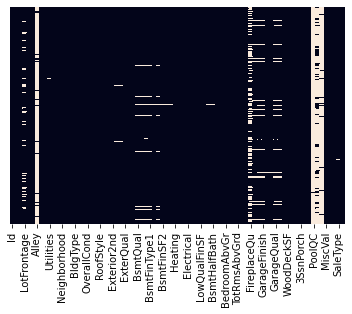

In [43]:
sns.heatmap(test_df.isnull(),yticklabels = False, cbar = False) ### Shows heatmap for missing values per column

In [44]:
test_df.info()  ### Gives info on variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [45]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())   ## Fills missing frontage vals with mean of all vals

In [46]:
test_df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [47]:
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

In [48]:
test_df.drop(['Alley'],axis=1,inplace=True)

In [49]:
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])

In [50]:
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])

In [51]:
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [52]:
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

In [53]:
test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [54]:
test_df.shape

(1459, 75)

In [55]:
test_df.drop(['Id'],axis=1,inplace=True)

In [56]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 74, dtype: int64

In [58]:
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

<AxesSubplot:>

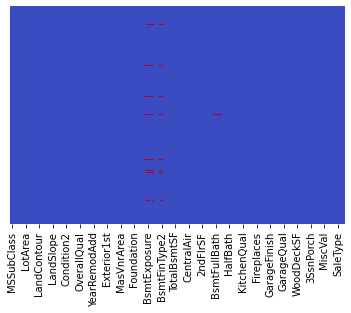

In [59]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [60]:
test_df.dropna(inplace=True)

<AxesSubplot:>

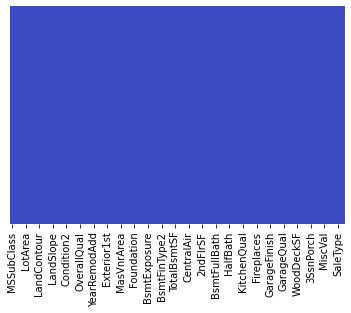

In [61]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [62]:
test_df.shape

(1409, 74)

In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1409 non-null   int64  
 1   MSZoning       1409 non-null   object 
 2   LotFrontage    1409 non-null   float64
 3   LotArea        1409 non-null   int64  
 4   Street         1409 non-null   object 
 5   LotShape       1409 non-null   object 
 6   LandContour    1409 non-null   object 
 7   Utilities      1409 non-null   object 
 8   LotConfig      1409 non-null   object 
 9   LandSlope      1409 non-null   object 
 10  Neighborhood   1409 non-null   object 
 11  Condition1     1409 non-null   object 
 12  Condition2     1409 non-null   object 
 13  BldgType       1409 non-null   object 
 14  HouseStyle     1409 non-null   object 
 15  OverallQual    1409 non-null   int64  
 16  OverallCond    1409 non-null   int64  
 17  YearBuilt      1409 non-null   int64  
 18  YearRemo

In [65]:
test_df2 = test_df[['MSZoning','PoolArea','LotFrontage','LotArea','YearBuilt','GarageArea']]

In [66]:
test_df2.head()

,MSZoning,PoolArea,LotFrontage,LotArea,YearBuilt,GarageArea
0,RH,0,80.0,11622,1961,730.0
1,RL,0,81.0,14267,1958,312.0
2,RL,0,74.0,13830,1997,482.0
3,RL,0,78.0,9978,1998,470.0
4,RL,0,43.0,5005,1992,506.0
